In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
import os
import cv2
import pickle
import itertools
import tensorflow as tf
import pydot
import graphviz

import keras
import tensorflow


from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils.vis_utils import plot_model

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_skin_dir = "C:\\pythonclass\\Students Assignments\\assigmentProject\\Emmanuel\\Skin Cancer Data sets"
df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [3]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {

    'nv': 'Melanocytic_nevi',
    'mel': 'melanoma',
    'bkl': 'Benign_keratosis-like_lesions',
    'bcc': 'Basal_cell_carcinoma',
    'akiec': 'Actinic_keratoses',
    'vasc': 'Vascular_lesions',
    'df': 'Dermatofibroma'
}

lesion_danger = {
    'nv': 0, # 0 for benign
    'mel': 1, # 1 for malignant
    'bkl': 0, # 0 for benign
    'bcc': 1, # 1 for malignant
    'akiec': 1, # 1 for malignant
    'vasc': 0,
    'df': 0
}

In [4]:
df.shape

(10015, 7)

# Data Preprocessing

Creating dictionary for displaying more human-friendly labels.

In [5]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_dir = "C:\\pythonclass\\Students Assignments\\assigmentProject\\Emmanuel\\Skin Cancer Data sets\\skin cancer 1"

Merge images from both folders into one dictionary

In [6]:
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

Creating new columns for better understanding of features

In [7]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,C:\pythonclass\Students Assignments\assigmentP...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,C:\pythonclass\Students Assignments\assigmentP...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,C:\pythonclass\Students Assignments\assigmentP...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,C:\pythonclass\Students Assignments\assigmentP...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,C:\pythonclass\Students Assignments\assigmentP...,Benign keratosis-like lesions,2


In [8]:
labels = df['cell_type_idx']

In [9]:
labels.shape

(10015,)

# Pictorial representation of Images of dataset

In [10]:
# n_samples = 5
# fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
# for n_axs, (type_name, type_rows) in zip(m_axs, df.sort_values(['cell_type']).groupby('cell_type')):
#     n_axs[0].set_title(type_name)
#     for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
#         c_ax.imshow(c_row['image'])
#         c_ax.axis('off')
# fig.savefig('category_samples.png', dpi=300)

In [11]:
train_path = "C:\\pythonclass\\Students Assignments\\assigmentProject\\Emmanuel\\Skin Cancer Data sets\\skin cancer 1"
test_path = "C:\\pythonclass\\Students Assignments\\assigmentProject\\Emmanuel\\Skin Cancer Data sets\\skin cancer 1"


Skin Cancer


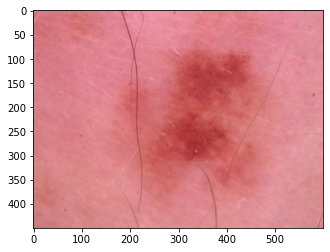

In [12]:
# Now we will navigate into the image folders to get the fruit images and then visualize the first image from different image folder.

for folder in os.listdir(test_path):
  sub_path = train_path +'/'+ folder

  print(folder)
  for i in range(1):
    temp_path = os.listdir(sub_path)[1]
    temp_path = sub_path +'/'+ temp_path
    img = mpimg.imread(temp_path)
    implot = plt.imshow(img)
    plt.show()

In [13]:
# After reading the images, we then create a function to convert the images into an array.
def imagearray(path, size):
  data = []
  for folder in os.listdir(path):
    sub_path = path + "/" + folder

    for img in os.listdir(sub_path):
      image_path = sub_path + "/" + img
      img_arr = cv2.imread(image_path)
      img_arr = cv2.resize(img_arr, size)
      data.append(img_arr)
  return data

In [14]:
size = (224, 224)

In [15]:
# Here, the images are converted to array and stored in the variable array
train = imagearray(train_path, size)

In [16]:
images = np.array(train)

In [17]:
# the images are then resized so that they maintain the same size for the training purpose

images = images/255

In [18]:
print("image shape", images.shape)

image shape (10015, 224, 224, 3)


In [19]:
# Now the feature (images) and labels (classes) are splited into train and test sets in the order of 80% and 20% respectively. Also, the split is generated randomly as specified in the code.

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 1234)

In [20]:
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)

In [26]:
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG19

In [27]:
# Define data augmentation for training images

# The ImageGenerator is used for Data Augmentation, batch loading and class balancing
def data_class(data_path, size, class_mode):
  datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images
  classes = datagen.flow_from_directory(data_path,
                                        target_size = size,
                                        batch_size = 32,
                                        class_mode = class_mode)
  return classes


In [28]:
# Load the pre-trained VGG19 model (excluding the top layers)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
num_classes = 7
predictions = Dense(num_classes, activation='sigmoid')(x)  # Output layer with 7 classes for skin cancer types


# Create the final model for training
model = Model(inputs=base_model.input, outputs=predictions)


In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

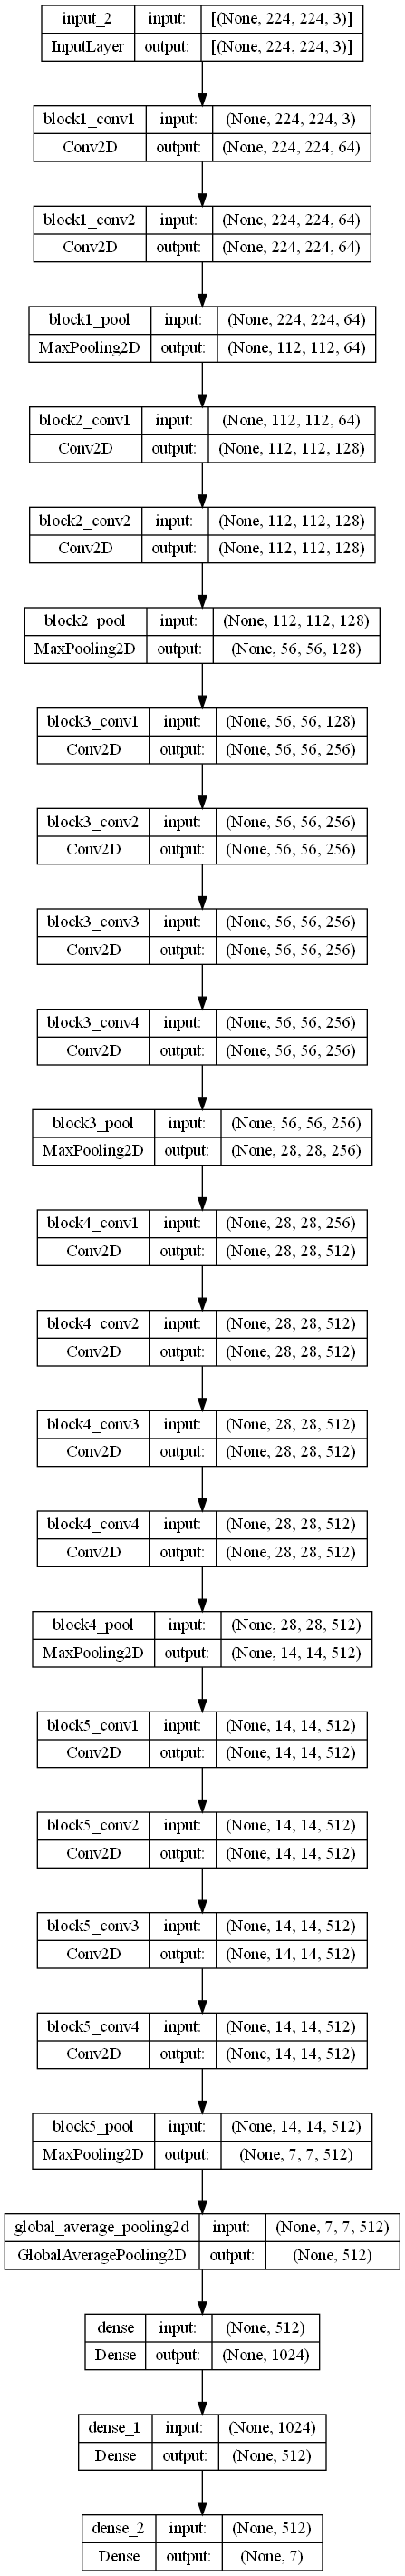

In [30]:
plot_model(model = model, show_shapes = True)

In [31]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

In [32]:
# Compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [33]:

# Train the model
history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 15, callbacks = [early_stop], batch_size = 32, shuffle = True)

Epoch 1/15
226/226 [==============================] - 2049s 9s/step - loss: 0.2651 - accuracy: 0.6698 - val_loss: 0.2635 - val_accuracy: 0.6633
Epoch 2/15
226/226 [==============================] - 1323s 6s/step - loss: 0.2584 - accuracy: 0.6731 - val_loss: 0.2699 - val_accuracy: 0.6633
Epoch 3/15
226/226 [==============================] - 1233s 5s/step - loss: 0.2589 - accuracy: 0.6731 - val_loss: 0.2633 - val_accuracy: 0.6633
Epoch 4/15
226/226 [==============================] - 1292s 6s/step - loss: 0.2570 - accuracy: 0.6731 - val_loss: 0.2606 - val_accuracy: 0.6633
Epoch 5/15
226/226 [==============================] - 1231s 5s/step - loss: 0.2561 - accuracy: 0.6731 - val_loss: 0.2611 - val_accuracy: 0.6633
Epoch 6/15
226/226 [==============================] - 1209s 5s/step - loss: 0.2562 - accuracy: 0.6731 - val_loss: 0.2608 - val_accuracy: 0.6633
Epoch 7/15
226/226 [==============================] - 1239s 5s/step - loss: 0.2553 - accuracy: 0.6731 - val_loss: 0.2620 - val_accuracy:

In [ ]:
# history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 50, callbacks = [early_stop], batch_size = 10, shuffle = True)

In [35]:
# Evaluate the model on the test set
test_accuracy = model.evaluate(x_test, y_test, batch_size=32)

print(f'Test Accuracy: {test_accuracy * 100}%')

63/63 [==============================] - 297s 5s/step - loss: 0.2616 - accuracy: 0.6595
Test Accuracy: [0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.2616026699542999, 0.6595107316970825, 0.26160266995429

In [36]:
loss_v, accuracy_v = model.evaluate(x_train, y_train, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))


251/251 [==============================] - 1264s 5s/step - loss: 0.2530 - accuracy: 0.6725
Validation: accuracy = 0.672491  ;  loss_v = 0.253021


In [37]:
from sklearn.metrics import precision_recall_fscore_support

# load your test data and the predictions of the CNN model
y_pred = model.predict(x_test) # shape: (num_samples,)

# convert probabilities to class labels (0 or 1) based on a threshold of 0.5
y_pred = np.round(y_pred).astype(int)

# calculate precision, recall, and F1 score
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='samples')

# print the results
print('Precision:', precision)
print('Sensitivity:', recall)
print('F1 score:', f1_score)

63/63 [==============================] - 281s 4s/step
Precision: 0.6475287069395906
Sensitivity: 0.6475287069395906
F1 score: 0.6475287069395906


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


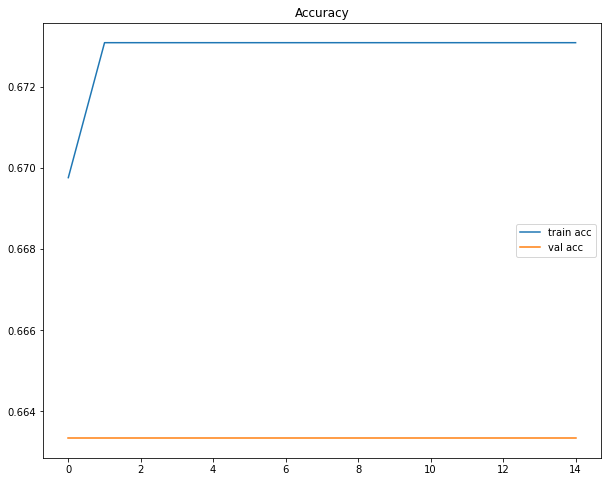

In [38]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

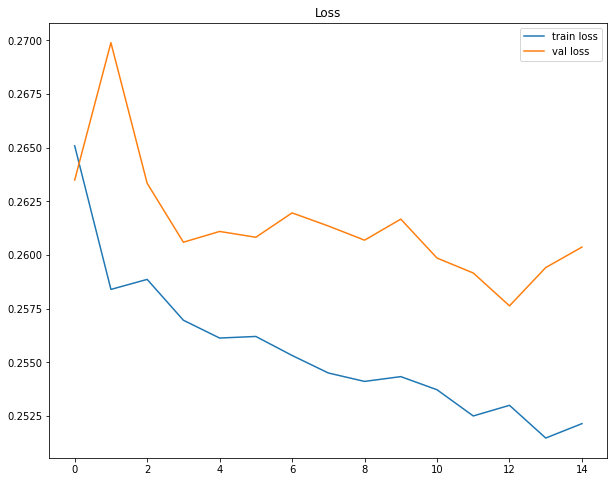

In [39]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

63/63 [==============================] - 321s 5s/step


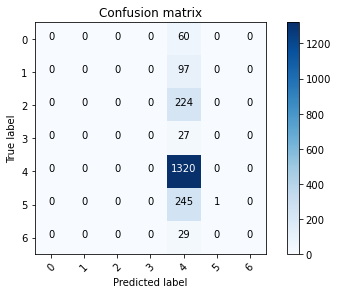

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7))

In [41]:
# Save the trained model for future use
model.save('skin_cancer_model.h5')